In [ ]:
import os
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')
import numpy as np
from dateutil.parser import parse
from skimage.morphology import remove_small_objects, remove_small_holes, opening, disk
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from utils.date_utils import dateListParser, dateStamp
from utils.name_utils import  stackFilePath

dateRangeList = [
#                ['2016-10-01', '2017-03-31'],
    
#               ['2016-03-01', '2016-10-31'],
#               ['2017-03-01', '2017-10-31'],
#               ['2018-03-01', '2018-10-31'],
#               ['2019-03-01', '2019-10-31'],
#               ['2020-03-01', '2020-10-31'],
#               ['2021-03-01', '2021-10-31'],
    
#                    ['2017-04-01', '2017-09-30'],
#                ['2018-04-01', '2018-09-30'],
#                    ['2019-04-01', '2019-09-30'],
                    ['2020-04-01', '2020-09-30'],
]

date_range = dateListParser(dateRangeList)[0]

print(dateStamp(date_range))

In [ ]:
stack_layer_np = np.load(stackFilePath(date_range))[2]

%matplotlib inline
plt.figure(figsize=(25,12))

ax = plt.gca()
im1 = ax.imshow(stack_layer_np, cmap='Greys', alpha=1.0)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

In [ ]:
%matplotlib inline

small_object_size = 1000

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from skimage.morphology import remove_small_objects, remove_small_holes, \
    disk, erosion
from twl.twl_utils import calculateNamedMask

from utils.name_utils import landmaskFilePath

landmask_np = np.load(landmaskFilePath())
print(landmask_np.shape)
seamask_np = calculateNamedMask('sea', landmask_np.shape[0], landmask_np.shape[1])

footprint = disk(20)
eroded = erosion(landmask_np, disk(10))

eroded = remove_small_holes(remove_small_objects(eroded, small_object_size),
                          small_object_size)

plt.figure(figsize=(50,150))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

im2 = ax.imshow(landmask_np, cmap='RdBu')
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right", size="3%", pad=0.75)
cbar    = plt.colorbar(im2, cax=cax)
cbar.ax.tick_params(labelsize=60)
cbar.set_label('...', fontsize=70, rotation=90, weight='bold')

In [ ]:
landmask_np = np.load(landmaskFilePath())
otsu_np = calculateNamedMask('otsu', landmask_np.shape[0], landmask_np.shape[1])
plt.figure(figsize=(50,150))
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
im2 = ax.imshow(otsu_np, cmap='RdBu')

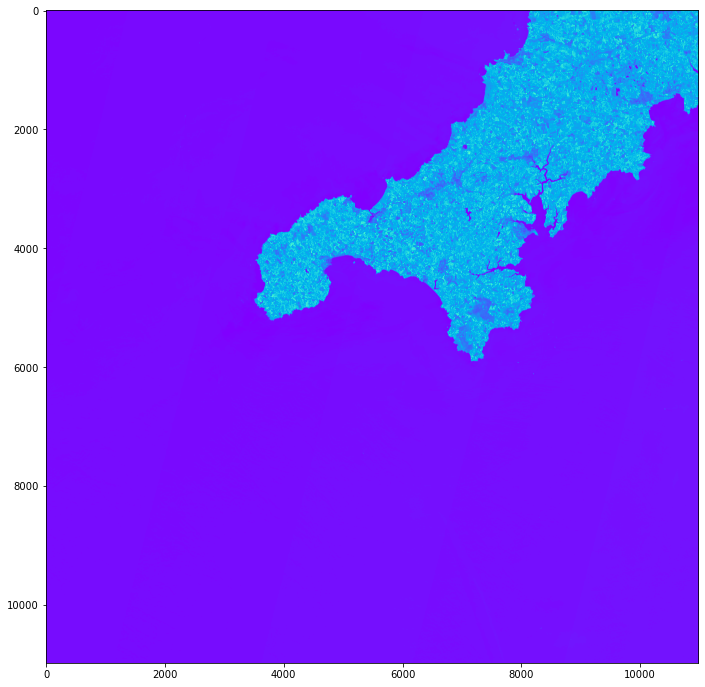

In [13]:
import numpy as np
import matplotlib.pyplot as plt
stack_layer_np = np.load('..\B8_image2.npy')

%matplotlib inline
plt.figure(figsize=(25,12))

ax = plt.gca()
im1 = ax.imshow(stack_layer_np, cmap='rainbow', alpha=1.0)